# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [5]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
heroes_df.describe()


,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [7]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,King Kong,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [8]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [9]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




Dealing with null values: heroes_df appears to have two variables with null values, one that numerical and one categorical. for the numerical i decided to replace the null values with the median value of that columne (Weight). for The categorical variable, Publisher, I've decided to replace the null values with "missing" in case this is a useful insight of the dataset later. I considered dropping the 15 rows that have null in Publisher, but the fact that there is no publisher could be useful.

In [10]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [11]:
#there are 237 weight values that equal -99. I'm not sure how to handle these observations, but they account for 32% of the data.
len(heroes_df.Weight)

734

In [12]:
237/734

0.3228882833787466

In [13]:
heroes_df.Weight.median()


62.0

In [14]:
heroes_df.Weight.mean()

43.8551912568306

In [15]:
heroes_df.Weight.value_counts()
#looks like there are 2 Null values but also there appear to be 237 rows at -99.0 value.

-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
 52.0      15
 86.0      15
 59.0      14
 56.0      13
 77.0      13
 61.0      13
 101.0     12
 50.0      12
 88.0      11
 63.0      11
 83.0      10
 95.0      10
 74.0      10
 65.0       9
 72.0       8
 68.0       8
 104.0      8
 135.0      8
 57.0       7
 97.0       7
 99.0       7
 117.0      6
 108.0      6
 55.0       5
 70.0       5
         ... 
 14.0       1
 356.0      1
 105.0      1
 324.0      1
 360.0      1
 236.0      1
 36.0       1
 140.0      1
 128.0      1
 248.0      1
 16.0       1
 45.0       1
 234.0      1
 96.0       1
 82.0       1
 76.0       1
 198.0      1
 116.0      1
 176.0      1
 170.0      1
 47.0       1
 78.0       1
 27.0       1
 25.0       1
 178.0      1
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

In [16]:
heroes_df['Weight'].fillna(heroes_df['Weight'].median(), inplace=True)

In [17]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [18]:
heroes_df['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Icon Comics            4
IDW Publishing         4
ABC Studios            4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
J. K. Rowling          1
South Park             1
Microsoft              1
Rebellion              1
Universal Studios      1
J. R. R. Tolkien       1
Titan Books            1
Name: Publisher, dtype: int64

In [19]:
heroes_df['Publisher'].fillna("missing", inplace = True)

In [20]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [21]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [22]:
display(heroes_df.head())
powers_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
powers_df.rename(columns={'hero_names': 'name'}, inplace=True)
powers_df = powers_df.astype('str')

In [24]:
joined_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
joined_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [25]:
female_df = joined_df.loc[joined_df['Gender'] != "Male"]

In [26]:
female_df.set_index("Gender", inplace=True)

In [27]:
female_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omnipresent,Omniscient,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
Gender,,,,,,,,,,,,,,,,,,,,,
Female,True,False,False,False,False,False,False,False,False,False,...,False,False,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0
Female,False,False,False,False,False,False,False,False,True,False,...,False,False,brown,-,Black,163.0,Marvel Comics,-,good,54.0
Female,False,False,False,False,False,False,False,False,False,False,...,False,False,-,-,-,-99.0,Image Comics,-,bad,-99.0
Female,True,True,False,False,False,True,False,False,False,False,...,False,False,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0
Female,False,False,False,False,False,True,False,False,False,False,...,False,False,violet,-,Purple,173.0,Marvel Comics,-,bad,57.0


In [28]:
male_df = joined_df.loc[joined_df['Gender'] != "Female"]
male_df.set_index("Gender", inplace=True)
male_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omnipresent,Omniscient,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
Gender,,,,,,,,,,,,,,,,,,,,,
Male,False,True,False,False,False,True,False,False,False,False,...,False,False,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Male,True,True,False,False,True,True,False,False,False,False,...,False,False,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Male,False,False,True,False,False,False,False,False,False,False,...,False,False,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Male,False,True,False,False,False,False,False,False,False,False,...,False,False,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Male,False,False,False,True,False,False,False,False,True,False,...,False,False,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


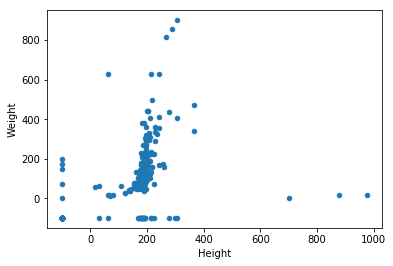

In [29]:
#Create a scatterplot of the height and weight of each hero, with weight as the y-axis. 
#Plot both the male and female heroes subset into each dataframe, 
#and make the color for each point in the scatterplot correspond to the gender of the superhero.
heroes_df.plot.scatter(x="Height", y = "Weight")

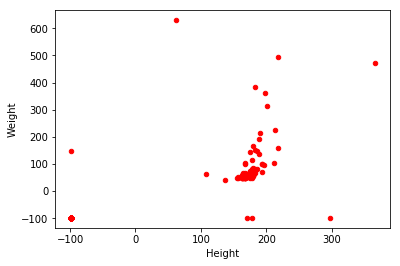

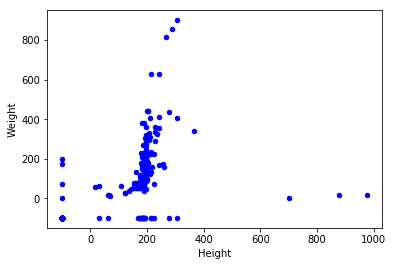

In [30]:
female_df.plot.scatter(x='Height', y = 'Weight', c="red")
male_df.plot.scatter(x='Height', y='Weight', c="blue")

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [31]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender']=='Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("Distribution of {} by {} Heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


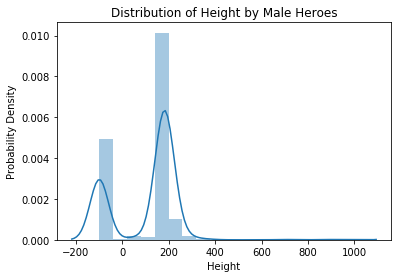

In [32]:
#Male Height
show_distplot(heroes_df, 'Male', 'Height')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


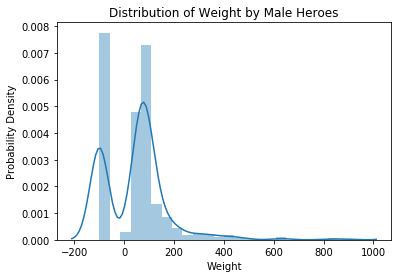

In [33]:
# Male Weight
show_distplot(heroes_df, 'Male', 'Weight')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


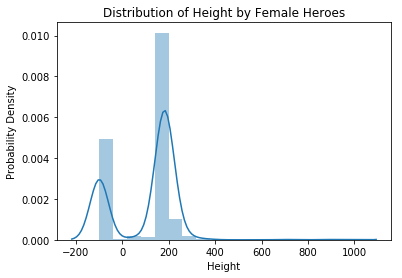

In [34]:
# Female Height
show_distplot(heroes_df, 'Female', 'Height')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


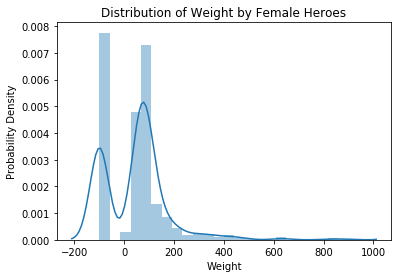

In [35]:
# Female Weight
show_distplot(heroes_df, "Female", "Weight")

In [36]:
print("Male Hero Height Stats")
male_heroes_df.Height.describe()

Male Hero Height Stats


count    505.000000
mean     107.275248
std      144.435370
min      -99.000000
25%      -99.000000
50%      180.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64

In [37]:
print("Male Hero Weight Stats")
male_heroes_df.Weight.describe()

Male Hero Weight Stats


count    505.000000
mean      52.071287
std      139.075515
min      -99.000000
25%      -99.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64

In [38]:
print("Female Hero Height Stats")
female_heroes_df.Height.describe()

Female Hero Height Stats


count    200.000000
mean      98.052500
std      124.819341
min      -99.000000
25%      -99.000000
50%      168.000000
75%      175.000000
max      366.000000
Name: Height, dtype: float64

In [39]:
print("Female Hero Weight Stats")
female_heroes_df.Weight.describe()

Female Hero Weight Stats


count    200.000000
mean      27.265000
std      103.648007
min      -99.000000
25%      -99.000000
50%       54.000000
75%       61.000000
max      630.000000
Name: Weight, dtype: float64

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



Each of these distributions have two humps, which indicates that these are not as normally distributed as one might have expected. Also, they all have some unexpected outliers - namely that they all have a nigh amount of negative values. I think this is due to the fact that -99.0 was used perhaps as a null value?  The bottom quantile or 25% of the data has a value of -99. All the means are lower than the medians, likely because they're being pulled down by the -99 outliers.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [40]:
#the 5 most common powers overall
powers_df.columns

Index(['name', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

In [41]:
len(joined_df.columns)

176

In [42]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis = 1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5]

top_5 = top_5_powers(joined_df)

In [43]:
print(top_5)

[('Super Strength', 362), ('Stamina', 294), ('Durability', 262), ('Super Speed', 251), ('Agility', 244)]


In [44]:
joined_df.Publisher.head()

name
A-Bomb             Marvel Comics
Abe Sapien     Dark Horse Comics
Abin Sur               DC Comics
Abomination        Marvel Comics
Abraxas            Marvel Comics
Name: Publisher, dtype: object

In [45]:
marvel_df = joined_df[joined_df["Publisher"] == "Marvel Comics"]
marvel_top_5 = top_5_powers(marvel_df)
print(marvel_top_5)

[('Super Strength', 204), ('Durability', 154), ('Stamina', 150), ('Super Speed', 137), ('Agility', 126)]


In [46]:
dc_df = joined_df[joined_df['Publisher'] == "DC Comics"]
dc_top_5 = top_5_powers(dc_df)
print(dc_top_5)

[('Super Strength', 109), ('Stamina', 90), ('Flight', 86), ('Super Speed', 79), ('Agility', 71)]


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________
Super Strength and Stamina are within the top 3 overall and for each subset. between DC and Marvel, super strength is top, and the only different powers between the two are that dc has flight and marvel has durability. marvel overall has a lot higher counts in each of the top 5 powers.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [47]:
joined_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [48]:
#Let's see if there is a significant difference between heroes that can fly in terms of weight compared to overall.
joined_df["Flight"].value_counts()

False    448
True     212
Name: Flight, dtype: int64

In [49]:
Has_Flight = joined_df[joined_df["Flight"]=="True"]

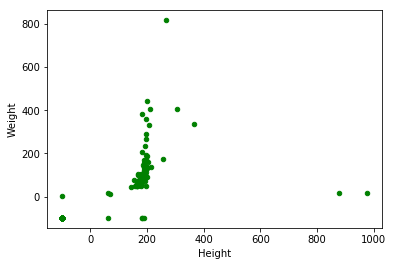

In [50]:
Has_Flight.plot.scatter(x="Height", y="Weight", c="green")

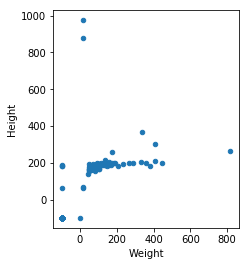

In [51]:
ax=Has_Flight.plot.scatter("Weight", "Height")
ax.set_aspect("equal")

In [52]:
Has_Flight["Weight"].head()

name
Abraxas         -99.0
Adam Strange     88.0
Air-Walker      108.0
Alan Scott       90.0
Amazo           173.0
Name: Weight, dtype: float64

In [53]:
Cannot_Fly = joined_df[joined_df["Flight"]=="False"]

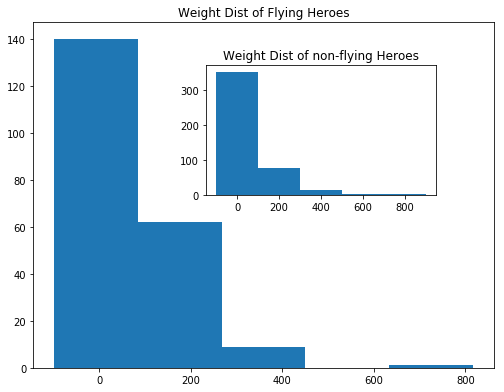

In [54]:
fig = plt.figure(figsize = (8,6))

ax1=fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2=fig.add_axes([0.4, 0.5, 0.4, 0.3])

ax1.hist(Has_Flight['Weight'], bins=5)
ax2.hist(Cannot_Fly["Weight"], bins=5)

ax1.set_title("Weight Dist of Flying Heroes")
ax2.set_title("Weight Dist of non-flying Heroes")

plt.show()

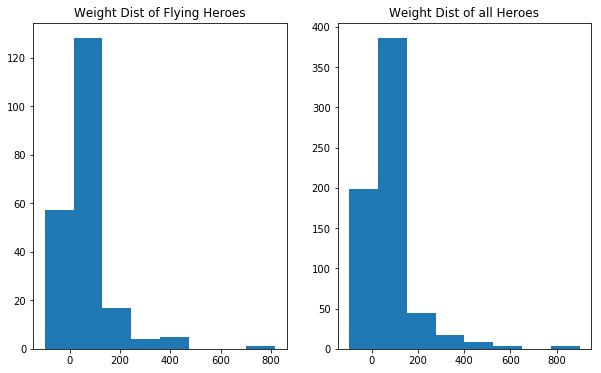

In [55]:
fig = plt.figure(figsize=(10,6))

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.hist(Has_Flight["Weight"],bins=8)
ax2.hist(joined_df["Weight"], bins=8)

ax1.set_title("Weight Dist of Flying Heroes")
ax2.set_title("Weight Dist of all Heroes")

plt.show()

There doesn't appear to be much of a difference between the weight distributions of those that can fly and those that can't. 

In [56]:
heroes_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [57]:
joined_df.Gender.head()

name
A-Bomb         Male
Abe Sapien     Male
Abin Sur       Male
Abomination    Male
Abraxas        Male
Name: Gender, dtype: object

In [58]:
female_top_5 = top_5_powers(female_heroes_df)
print(female_top_5)

[('name', 0.0)]


In [59]:
female_df = joined_df[joined_df["Gender"] == "Female"]

In [60]:
female_top_5 = top_5_powers(female_df)

In [61]:
print(female_top_5)

[('Super Strength', 88), ('Stamina', 69), ('Agility', 66), ('Durability', 59), ('Super Speed', 58)]


In [62]:
male_df = joined_df[joined_df["Gender"] == "Male"]
male_top_5 = top_5_powers(male_df)
print(male_top_5)

[('Super Strength', 263), ('Stamina', 222), ('Durability', 196), ('Super Speed', 187), ('Agility', 173)]


In [63]:
type(male_top_5)

list

In [64]:
male_top_5[2]

('Durability', 196)

In [65]:
male_top_5 = dict(male_top_5)

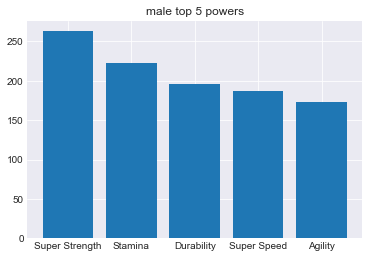

In [84]:
plt.bar(range(len(male_top_5)), male_top_5.values(), align='center')
plt.xticks(range(len(male_top_5)), list(male_top_5.keys()))
plt.title("male top 5 powers")
plt.show()

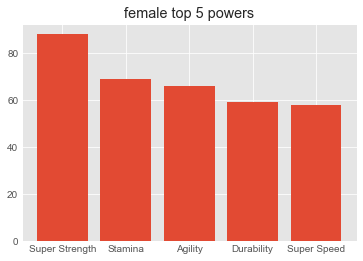

In [104]:
plt.style.use("ggplot")
plt.bar(range(len(female_top_5)), female_top_5.values(), align="center")
plt.xticks(range(len(female_top_5)), list(female_top_5.keys()))
plt.title("female top 5 powers")
plt.show()

In [98]:
print(female_top_5)

{'Super Strength': 88, 'Stamina': 69, 'Agility': 66, 'Durability': 59, 'Super Speed': 58}


In [99]:
print(female_top_5.keys())

dict_keys(['Super Strength', 'Stamina', 'Agility', 'Durability', 'Super Speed'])


In [89]:
print(list(female_top_5.keys()))

['Super Strength', 'Stamina', 'Agility', 'Durability', 'Super Speed']


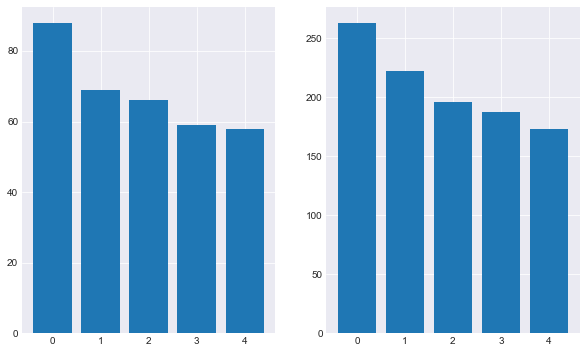

In [90]:
plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize = (10,6))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax.bar(range(len(female_top_5)), female_top_5.values(), align = "center")
ax1.bar(range(len(male_top_5)), male_top_5.values(), align = "center")
ax.set_xticks(range(len(female_top_5)), list(female_top_5.keys()))
ax1.set_xticks(range(len(male_top_5)), list(male_top_5.keys()))

ax1.set_title()
plt.show()

In [ ]:
#there doesn't appear to be much of a difference between the top powers for female and male superheroes.

In [105]:
male_df.Height.mean()

117.08405172413794

In [106]:
female_df.Height.mean()

111.6938202247191

In [112]:
male_df.columns

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Omniscient', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object', length=176)

In [121]:
joined_df.Race.value_counts

-                     247
Human                 195
Mutant                 62
God / Eternal          14
Cyborg                 11
Human / Radiation      11
Android                 9
Symbiote                8
Kryptonian              7
Alien                   7
Demon                   6
Alpha                   5
Atlantean               5
Asgardian               5
Cosmic Entity           4
Inhuman                 4
Human / Altered         3
Animal                  3
New God                 3
Frost Giant             2
Eternal                 2
Demi-God                2
Vampire                 2
Saiyan                  2
Metahuman               2
Amazon                  2
Human / Cosmic          2
Human-Kree              2
Czarnian                1
Bizarro                 1
                     ... 
Neyaphem                1
Gungan                  1
Human-Spartoi           1
Martian                 1
Talokite                1
Strontian               1
Human-Vulcan            1
Ungaran     

In [123]:
joined_df["Eye color"].unique()

array(['yellow', 'blue', 'green', 'brown', '-', 'red', 'violet', 'white',
       'purple', 'black', 'silver', 'yellow / red', 'grey',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue',
       'bown'], dtype=object)

In [130]:
#What is the mean weight without the -99 values? How does it compare to the original mean weight?
weight_mean = joined_df.Weight.mean()
print(weight_mean)

52.277272727272724


In [154]:
sorted_weight_df = joined_df.loc[joined_df['Weight'] > 0]


In [155]:
sorted_weight_df = sorted_weight_df.Weight.sort_values(ascending=False)

In [159]:
sorted_weight_df.mean()

113.43191489361702

In [ ]:
#mean weight without the -99 values is more than twice as high...

In [161]:
#What is the mean weight of humans versus mutants versus cyborgs?
heroes_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [168]:
heroes_df.loc[heroes_df["Race"] == "Human"].Weight.mean()


53.16826923076923

In [169]:
heroes_df.loc[heroes_df["Race"] == "Mutant"].Weight.mean()

53.507936507936506

In [170]:
x=heroes_df.loc[heroes_df["Race"] == "Cyborg"].Weight.mean()
print("The avg weight of a mutant is {}".format(x))

The avg weight of a mutant is 117.9090909090909


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data